In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
from glob import glob

from utils.datasets.foscal.patient import FOSCALPatient
from utils.preprocessing.numpy import get_idxs_of_annotated_slices
from metrics import compute_segmentation_metrics

# Load the data

In [3]:
patients = []
dset_dir = "/data/Datasets/stroke/ISBI_FOSCAL/"
patient_dirs = glob(os.path.join(dset_dir, "*"))
for patient_dir in patient_dirs:
    patient = FOSCALPatient(patient_dir)
    patients.append(patient)

In [3]:
modalities = ["ADC", "DWI"]
masks_daniel = patient.get_mask(modalities=modalities, radiologist="Daniel")
masks_andres = patient.get_mask(modalities=modalities, radiologist="Andres")

In [4]:
idxs_with_annotations = get_idxs_of_annotated_slices(masks_daniel["ADC"])
masks_daniel["ADC"] = masks_daniel["ADC"][..., idxs_with_annotations]

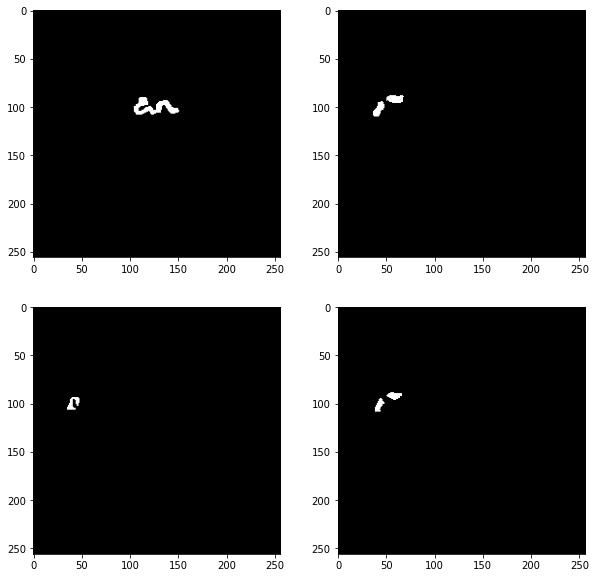

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(masks_daniel["ADC"][..., 12], cmap="gray")
axs[0, 1].imshow(masks_daniel["DWI"][..., 12], cmap="gray")
axs[1, 0].imshow(masks_andres["ADC"][..., 12], cmap="gray")
axs[1, 1].imshow(masks_andres["DWI"][..., 12], cmap="gray")

In [6]:
patient.adc_daniel_mask

# Visualize some cases

In [7]:
modalities = ["ADC", "DWI"]
normalization = "min_max"
data = patients[0].get_data(modalities=modalities, normalization=normalization)
masks = patients[0].get_mask(modalities=modalities)

In [8]:
compute_segmentation_metrics(masks["DWI"], masks["ADC"])

{'sens': 0.0,
 'spec': 0.9998570315583333,
 'ppv': 0.0,
 'npv': 0.999799739893307,
 'dsc': 0.0,
 'avd': 0.33389544688026984,
 'hd': 19.339079605813716}

# Agreement between radiologists using ADC masks

In [31]:
Kappas = []
modality = "ADC"

for patient in patients:
    masks_daniel = np.expand_dims(patient.get_mask(modalities=[modality], radiologist="Daniel")[modality], axis=2)
    masks_andres = np.expand_dims(patient.get_mask(modalities=[modality], radiologist="Andres")[modality], axis=2)

    dims = np.shape(masks_daniel)
    total = dims[0]*dims[1]*dims[2]*dims[3]

    andres_0 = np.sum(masks_andres == 0)
    daniel_0 = np.sum(masks_daniel == 0)
    andres_1 = np.sum(masks_andres == 1)
    daniel_1 = np.sum(masks_daniel == 1)

    andres_daniel_0 = np.sum(np.sum(np.concatenate((masks_andres == 0, masks_daniel == 0), axis=2), axis=2) == 2)
    andres_daniel_1 = np.sum(np.sum(np.concatenate((masks_andres == 1, masks_daniel == 1), axis=2), axis=2) == 2)

    p_0  = (andres_daniel_0 + andres_daniel_1)/total
    si_a = (andres_1/total) * (daniel_1/total)
    no_a = (andres_0/total) * (daniel_0/total)
    p_e  = si_a + no_a
    kappa = (p_0 - p_e)/(1 - p_e)

    Kappas.append(kappa)
    print("--------------------------------")
    print(andres_daniel_1, andres_daniel_0)
    print(andres_0, andres_1)
    print(daniel_0, daniel_1)
    print(total)
    print(kappa)
    print("--------------------------------")

print("kappa primedio:",np.mean(Kappas))
    
    

--------------------------------
0 1727579
1727826 174
1727753 247
1728000
-0.00011816848811488544
--------------------------------
--------------------------------
0 1638335
1638358 42
1638377 23
1638400
-1.8141854828931586e-05
--------------------------------
--------------------------------
1660 1725647
1726295 1705
1725692 2308
1728000
0.8271150224182775
--------------------------------
--------------------------------
295 1701984
1703413 523
1702212 1724
1703936
0.2622248331942775
--------------------------------
--------------------------------
515 1702919
1703247 689
1703093 843
1703936
0.672177877355239
--------------------------------
--------------------------------
235 1694995
1695071 673
1695433 311
1695744
0.47751119925547647
--------------------------------
--------------------------------
125 1572616
1572703 161
1572652 212
1572864
0.6702029127330877
--------------------------------
--------------------------------
104 1703676
1703815 121
1703693 243
1703936
0.5713879335

# Agreement between radiologists using DWI masks

In [32]:
Kappas = []
modality = "DWI"

for patient in patients:
    masks_daniel = np.expand_dims(patient.get_mask(modalities=[modality], radiologist="Daniel")[modality], axis=2)
    masks_andres = np.expand_dims(patient.get_mask(modalities=[modality], radiologist="Andres")[modality], axis=2)

    dims = np.shape(masks_daniel)
    total = dims[0]*dims[1]*dims[2]*dims[3]

    andres_0 = np.sum(masks_andres == 0)
    daniel_0 = np.sum(masks_daniel == 0)
    andres_1 = np.sum(masks_andres == 1)
    daniel_1 = np.sum(masks_daniel == 1)

    andres_daniel_0 = np.sum(np.sum(np.concatenate((masks_andres == 0, masks_daniel == 0), axis=2), axis=2) == 2)
    andres_daniel_1 = np.sum(np.sum(np.concatenate((masks_andres == 1, masks_daniel == 1), axis=2), axis=2) == 2)

    p_0  = (andres_daniel_0 + andres_daniel_1)/total
    si_a = (andres_1/total) * (daniel_1/total)
    no_a = (andres_0/total) * (daniel_0/total)
    p_e  = si_a + no_a
    kappa = (p_0 - p_e)/(1 - p_e)

    Kappas.append(kappa)
    print("--------------------------------")
    print(andres_daniel_1, andres_daniel_0)
    print(andres_0, andres_1)
    print(daniel_0, daniel_1)
    print(total)
    print(kappa)
    print("--------------------------------")

print("kappa primedio:",np.mean(Kappas))

--------------------------------
272 1727635
1727709 291
1727654 346
1728000
0.8539764257193607
--------------------------------
--------------------------------
0 1638323
1638324 76
1638399 1
1638400
-1.2048527860985651e-06
--------------------------------
--------------------------------
2393 1724617
1725536 2464
1724688 3312
1728000
0.8283203650660431
--------------------------------
--------------------------------
3717 1698472
1699473 4463
1699218 4718
1703936
0.809202093419899
--------------------------------
--------------------------------
694 1701798
1703143 793
1701897 2039
1703936
0.4897710629643125
--------------------------------
--------------------------------
0 1688348
1691728 4016
1692364 3380
1695744
-0.00216932346185476
--------------------------------
--------------------------------
0 1570232
1572294 570
1570802 2062
1572864
-0.0005681501549402575
--------------------------------
--------------------------------
0 1703468
1703764 172
1703640 296
1703936
-0.00012770

# Agreement between ADC and DWI masks of the same radiologist

In [33]:
Kappas = []

for patient in patients:
    masks_daniel = np.expand_dims(patient.get_mask(modalities=['ADC'], radiologist="Daniel")['ADC'], axis=2)
    masks_andres = np.expand_dims(patient.get_mask(modalities=['DWI'], radiologist="Andres")['DWI'], axis=2)

    dims = np.shape(masks_daniel)
    total = dims[0]*dims[1]*dims[2]*dims[3]

    andres_0 = np.sum(masks_andres == 0)
    daniel_0 = np.sum(masks_daniel == 0)
    andres_1 = np.sum(masks_andres == 1)
    daniel_1 = np.sum(masks_daniel == 1)

    andres_daniel_0 = np.sum(np.sum(np.concatenate((masks_andres == 0, masks_daniel == 0), axis=2), axis=2) == 2)
    andres_daniel_1 = np.sum(np.sum(np.concatenate((masks_andres == 1, masks_daniel == 1), axis=2), axis=2) == 2)

    p_0  = (andres_daniel_0 + andres_daniel_1)/total
    si_a = (andres_1/total) * (daniel_1/total)
    no_a = (andres_0/total) * (daniel_0/total)
    p_e  = si_a + no_a
    kappa = (p_0 - p_e)/(1 - p_e)

    Kappas.append(kappa)
    print("--------------------------------")
    print(andres_daniel_1, andres_daniel_0)
    print(andres_0, andres_1)
    print(daniel_0, daniel_1)
    print(total)
    print(kappa)
    print("--------------------------------")

print("kappa primedio:",np.mean(Kappas))

--------------------------------
0 1727462
1727709 291
1727753 247
1728000
-0.00015465397375003892
--------------------------------
--------------------------------
0 1638301
1638324 76
1638377 23
1638400
-2.155389048636569e-05
--------------------------------
--------------------------------
1846 1725074
1725536 2464
1725692 2308
1728000
0.773367201620597
--------------------------------
--------------------------------
1239 1698988
1699473 4463
1702212 1724
1703936
0.39964087506586665
--------------------------------
--------------------------------
354 1702654
1703143 793
1703093 843
1703936
0.43249064929711645
--------------------------------
--------------------------------
266 1691683
1691728 4016
1695433 311
1695744
0.12265024293024256
--------------------------------
--------------------------------
200 1572282
1572294 570
1572652 212
1572864
0.5114129484210784
--------------------------------
--------------------------------
98 1703619
1703764 172
1703693 243
1703936
0.4722267